# Predict students grades

Here [Student Performance Data Set](https://www.kaggle.com/larsen0966/student-performance-data-set) dataset by [Data-Science Sean](https://www.kaggle.com/larsen0966) is used to perform `EDA` and create a `machine learning model` that can predict student's final grades i.e. Tthe goal is to predict `G3` using `G1` and `G2`.

![](https://media.giphy.com/media/IPbS5R4fSUl5S/giphy.gif)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, learning_curve, cross_val_score, train_test_split

from joblib import dump

In [2]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/student-performance-data-set/student-por.csv')
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
464,MS,M,16,R,GT3,T,1,1,at_home,other,...,3,4,4,3,4,5,6,11,11,11
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,4,10,9,9
552,MS,M,19,U,GT3,T,1,1,other,other,...,4,4,3,3,4,4,2,9,9,10
295,GP,M,19,U,LE3,A,4,3,services,at_home,...,4,3,1,1,1,1,4,11,13,14
225,GP,M,17,U,LE3,T,4,4,services,other,...,5,3,5,4,5,3,15,13,12,12


### 🧬 Attribute Information:

1. `school` - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. `sex` - student's sex (binary: 'F' - female or 'M' - male)
3. `age` - student's age (numeric: from 15 to 22)
4. `address` - student's home address type (binary: 'U' - urban or 'R' - rural)
5. `famsize` - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. `Pstatus` - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. `Medu` - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. `Fedu` - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. `Mjob` - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. `Fjob` - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. `reason` - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. `guardian` - student's guardian (nominal: 'mother', 'father' or 'other')
13. `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
16. `schoolsup` - extra educational support (binary: yes or no)
17. `famsup` - family educational support (binary: yes or no)
18. `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. `activities` - extra-curricular activities (binary: yes or no)
20. `nursery` - attended nursery school (binary: yes or no)
21. `higher` - wants to take higher education (binary: yes or no)
22. `internet` - Internet access at home (binary: yes or no)
23. `romantic` - with a romantic relationship (binary: yes or no)
24. `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
26. `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
27. `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. `health` - current health status (numeric: from 1 - very bad to 5 - very good)
30. `absences` - number of school absences (numeric: from 0 to 93)
31. `G1` - first period grade (numeric: from 0 to 20)
32. `G2` - second period grade (numeric: from 0 to 20)
33. `G3` - final grade (numeric: from 0 to 20, output target)

## ⛄️ Data preparation

In [3]:
# Getting the average of the grades
df['Average Grades'] = df[['G1', 'G2', 'G3']].mean(axis='columns')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          649 non-null    object 
 1   sex             649 non-null    object 
 2   age             649 non-null    int64  
 3   address         649 non-null    object 
 4   famsize         649 non-null    object 
 5   Pstatus         649 non-null    object 
 6   Medu            649 non-null    int64  
 7   Fedu            649 non-null    int64  
 8   Mjob            649 non-null    object 
 9   Fjob            649 non-null    object 
 10  reason          649 non-null    object 
 11  guardian        649 non-null    object 
 12  traveltime      649 non-null    int64  
 13  studytime       649 non-null    int64  
 14  failures        649 non-null    int64  
 15  schoolsup       649 non-null    object 
 16  famsup          649 non-null    object 
 17  paid            649 non-null    obj

No missing data

## 🏄‍♀️ Exploratory Data Analysis

**Helper plotting functions**

In [5]:
def plot_corr(df, annot=True):
    _, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(
        df.corr(),
        annot=annot,
        cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
        ax=ax
    )


def plot_histplot(column):
    sns.histplot(x=column, color='#65b87b', alpha=.7) 
    
    
def plot_countplot(df, column_name, ax=None):
    _df = df[[column_name]].copy()
    if len(_df[_df[column_name].isnull()]):
        _df.fillna('NaN', inplace=True)
    
    color = '#42b0f5' if ax != None else '#7661ff'
    sns.countplot(x=column_name, data=_df, color=color, alpha=.7, ax=ax)
    del _df

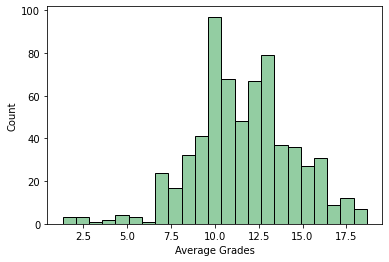

In [6]:
plot_histplot(df['Average Grades'])

**Pearson correlation coefficient significance** 
![Pearson correlation coefficient significance](https://miro.medium.com/max/466/1*Qz_gwy4ZaSZuOpl3IyO2HA.png)

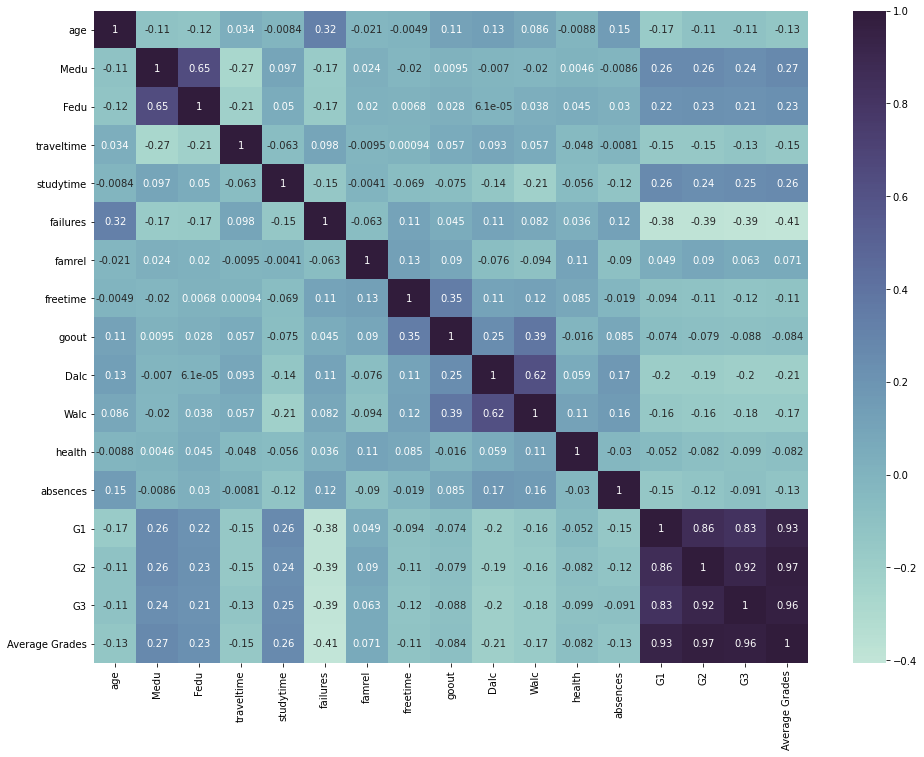

In [7]:
plot_corr(df)

> `age` has low positive correlation with `failure`
>
> `Medu` & `Fedu` has moderate positive correlation & they both have low positive correlation with `grades`
>
> `studytime` & `grades` have a low positive correlation
>
> `failure` has low negative correlation with `grades`
>
> `freetime` has low positive correlation with `goout`
>
> `goout` has low positive correlation with `Walc`
>
> `Walc` has moderate positive correlation with `Dalc` and they both have negligible negative correlation 

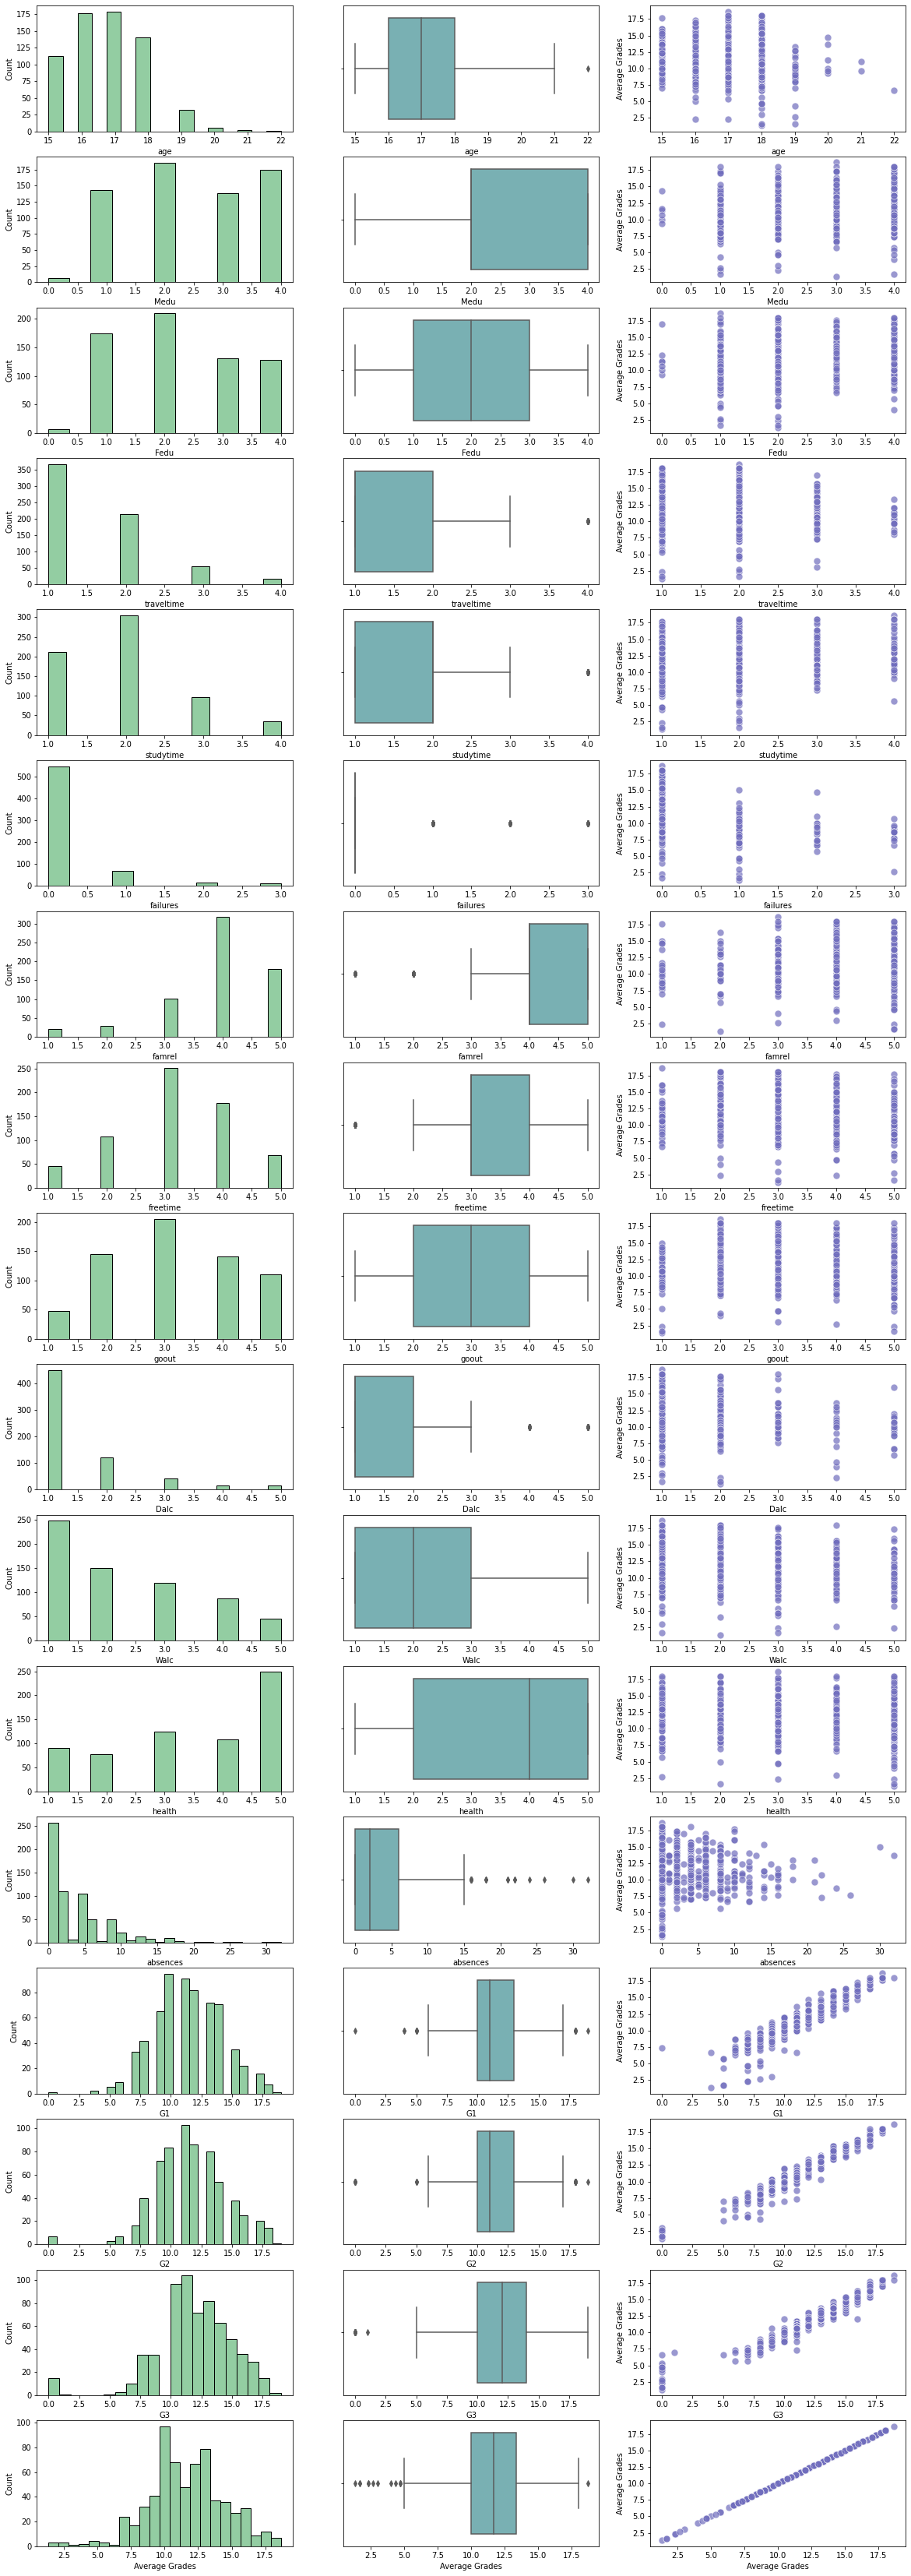

In [8]:
def plot_base_relation(df, figsize=(20, 60)):
    columns = df.columns.tolist()
    _, axs = plt.subplots(len(columns), 3, figsize=figsize)
    
    for idx, column in enumerate(columns):
        # To get distribution of data
        sns.histplot(
            x=df[column],
            kde=False,
            color='#65b87b', alpha=.7,
            ax=axs[idx][0]
        )

        # To get knowledge about outliers
        sns.boxplot(
            x=df[column],
            color='#6fb9bd',
            ax=axs[idx][1]
        )

        # To get its realtion with Average Grades
        sns.scatterplot(
            x=column, y='Average Grades', data=df,
            color='#706dbd', alpha=.7, s=80,
            ax=axs[idx][2]
        )
        
        
plot_base_relation(df.select_dtypes(include=[int, float]))

Here we won't be removing outliers since the dataset size is small

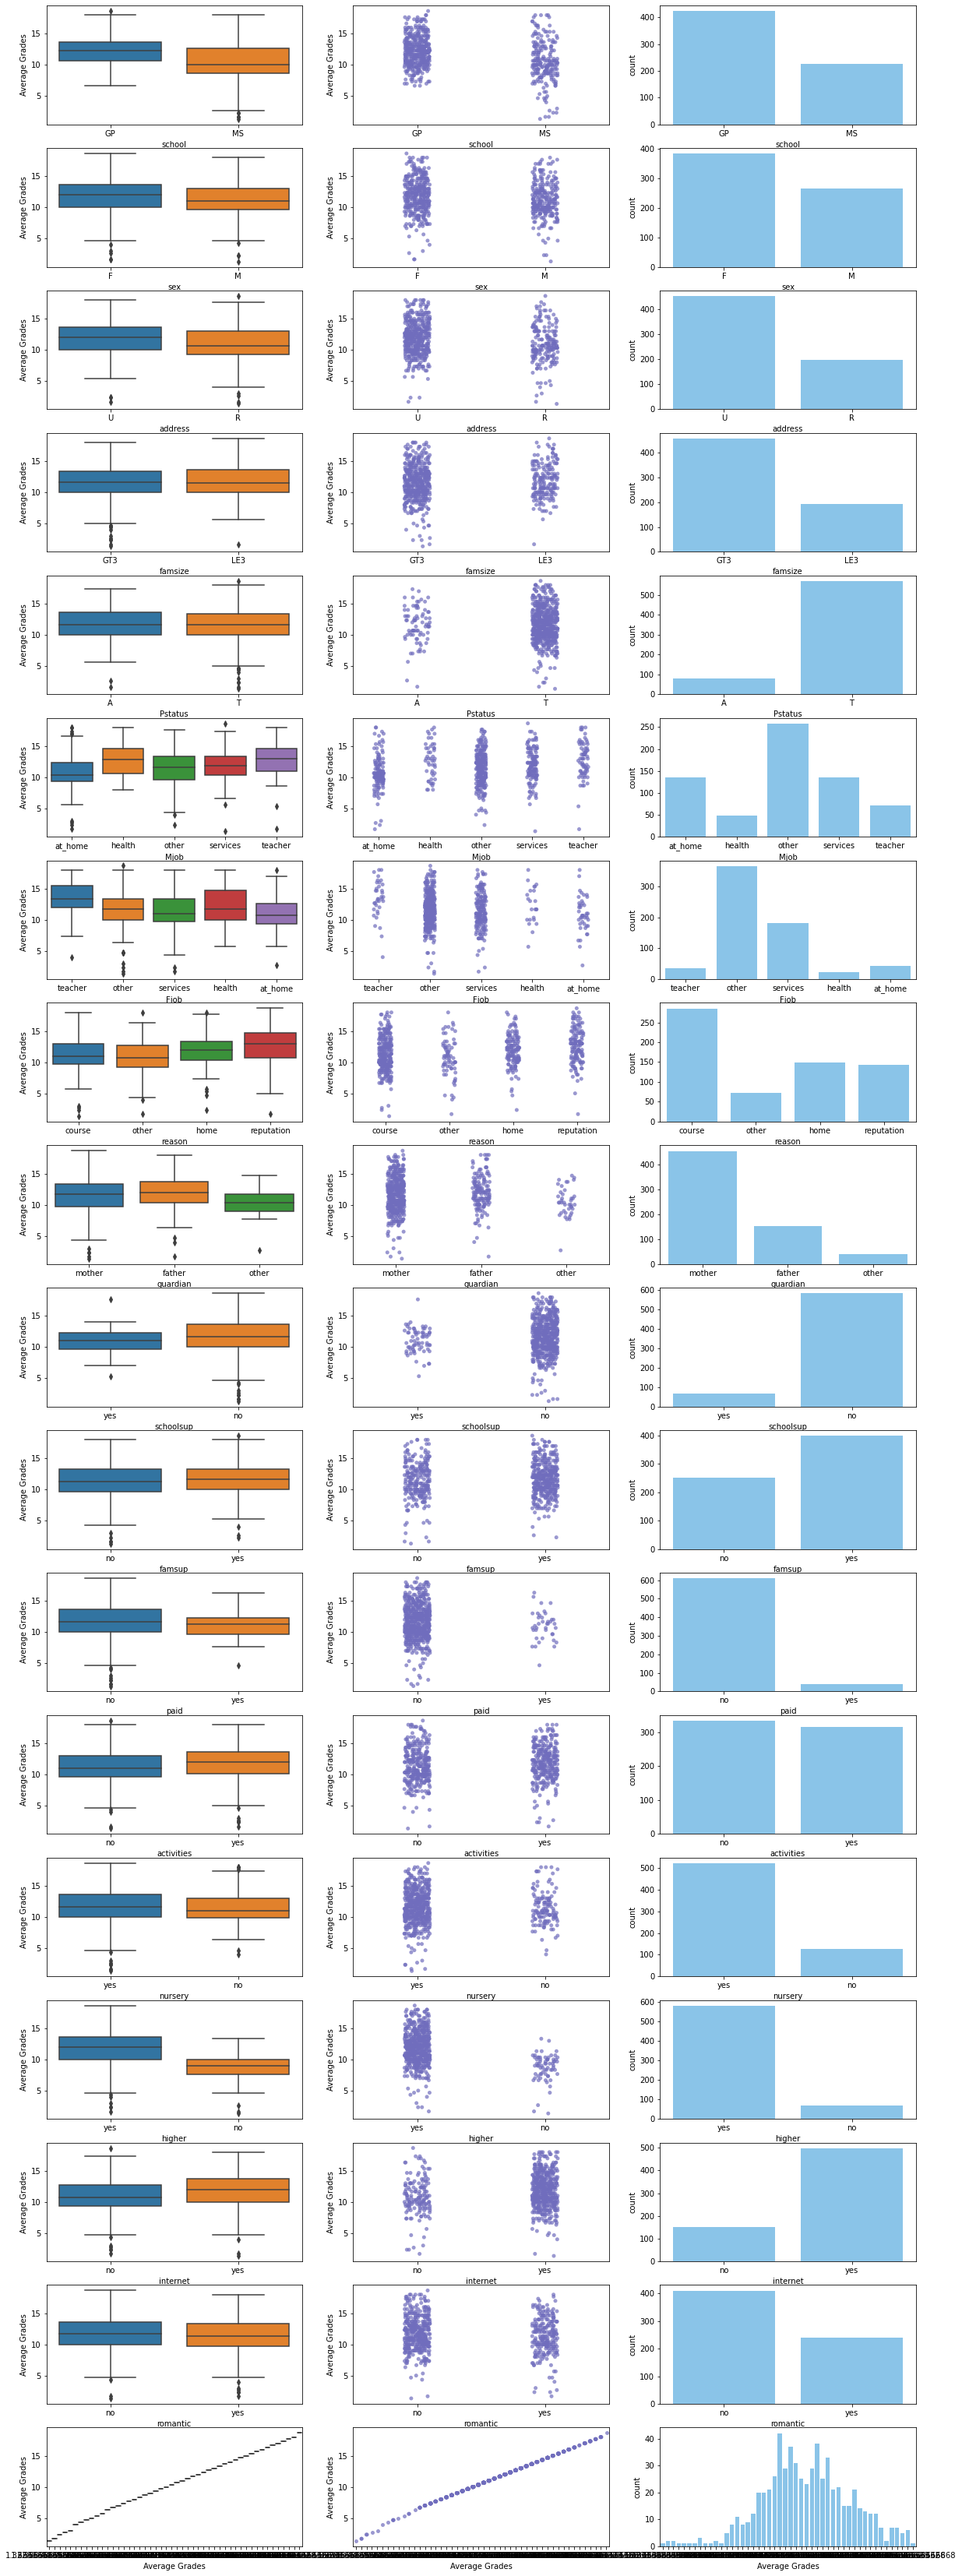

In [9]:
def plot_base_categorical_relation(df, figsize=(20, 60)):
    columns = df.columns.tolist()
    _, axs = plt.subplots(len(columns), 3, figsize=figsize)
    
    for idx, column in enumerate(columns):
        try:
            # To get knowledge about outliers & distribution
            sns.boxplot(x=df[column], y=df['Average Grades'], ax=axs[idx][0])

            # To get its realtion with Average Grades
            sns.stripplot(
                x=column, y='Average Grades', data=df,
                color='#706dbd', alpha=.7, jitter=.1,
                ax=axs[idx][1]
            )

            # To get count plot for `column` (considering NaN, so we can know 
            # how much of data is missing)
            plot_countplot(df, column, axs[idx][2])
        except ValueError:
            # ValueError: min() arg is an empty sequence
            # 
            # The above error happens while creating plot for some columns (maybe 
            # because it has NaN value)
            print(f'{column} cannot be plotted')
        
        
plot_base_categorical_relation(
    pd.concat(
        [df.select_dtypes(include=['object']), df[['Average Grades']]],
        axis='columns'
    )
)

Since the number of samples and categories in categorical columns are less, therefore doing `one hot encoding`

In [10]:
ohe_df = pd.get_dummies(df.select_dtypes('object'))
ohe_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0


In [11]:
# Removing one column after doing one hot encoding to avoid multi-collinearity issues
ohe_df.drop(['romantic_yes'], axis='columns', inplace=True)

In [12]:
# Removing the categorical columns and adding one hot encoded df

# Removing
categorical_columns = df.select_dtypes('object').columns.tolist()
df.drop(categorical_columns, axis='columns', inplace=True)

# Adding
df = pd.concat([df, ohe_df], axis='columns')
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,1,0,1,1,0,1
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,1,0,0,1,0,1,1
2,15,1,1,1,2,0,4,3,2,2,...,0,1,0,0,1,0,1,0,1,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,1,0,1,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,0,1,0,1,1,0,1


In [13]:
# Since is collinear to G1, G2 & G3
df.drop(['Average Grades'], axis='columns', inplace=True)

## 🎸 Modelling

Creating a regression model that can predict student's final grades.

In [14]:
# KFold for cross validation
kf = KFold(n_splits=10, shuffle=True)

In [15]:
# Shuffling the dataset
df = df.sample(frac=1, random_state=5)

In [16]:
# Selecting features by analysing which features are collinear to `G3` and collinear 
# to the selected columns
features = ['failures', 'Medu', 'studytime', 'absences', 'G1', 'G2', 'higher_no', 'higher_yes']
target = 'G3'

x_train, x_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.3, random_state=0
)

In [17]:
# Scaling the dataset

scaler = StandardScaler()

x_train = scaler.fit_transform(np.asanyarray(x_train))
y_train = np.asanyarray(y_train)

x_test = scaler.fit_transform(np.asanyarray(x_test))
y_test = np.asanyarray(y_test)

In [18]:
# Cross Validation
scoring = 'r2'
score = cross_val_score(linear_model.LinearRegression(), x_train, y_train, cv=4, scoring=scoring)
score.mean()

0.8783944255847314

In [19]:
# Plotting learning curve
_sizes = [i for i in range(1, 408, 10)]
train_sizes = np.array([_sizes])  # Relative sizes
scoring = 'neg_mean_squared_error'

lr = linear_model.LinearRegression()
train_sizes_abs, train_scores, cv_scores = learning_curve(
    lr, x_train, y_train, train_sizes=train_sizes, cv=10, scoring=scoring
)

In [20]:
train_scores_mean = []
for row in train_scores:
    _mean = row.mean()
    train_scores_mean.append(_mean)
    
cv_scores_mean = []
for row in cv_scores:
    _mean = row.mean()
    cv_scores_mean.append(_mean)    
    
train_scores_mean = -np.array(train_scores_mean)
cv_scores_mean = -np.array(cv_scores_mean)
    
print(train_scores_mean)
print()
print(cv_scores_mean)

[-0.          0.85613956  0.7643425   0.83625408  0.93876304  0.90017885
  0.84846326  0.89736381  0.92383124  1.26533395  1.23625874  1.20042449
  1.19653196  1.16276982  1.12585006  1.12803344  1.09643962  1.14321811
  1.11656211  1.08235939  1.16939999  1.21385534  1.18727435  1.16492946
  1.21079353  1.17425938  1.1524167   1.13332372  1.1124988   1.10836223
  1.08613118  1.0719886   1.05384932  1.05474665  1.05509991  1.03968269
  1.02348349  1.01195301  1.00356471  0.99646606  0.98521488]

[10.13608696  6.15675515  1.81700701  2.13255792  1.42163618  1.36438714
  1.31105831  1.30608981  1.22802515  1.33081133  1.28308077  1.26179323
  1.24542221  1.22377434  1.21832087  1.20960274  1.19524758  1.18664535
  1.19492084  1.19013424  1.19014185  1.18533794  1.18607429  1.18717085
  1.18755361  1.19020383  1.18753308  1.19887861  1.18177303  1.17724346
  1.17736314  1.17350068  1.17141019  1.17114805  1.17530889  1.17292931
  1.17024635  1.1736571   1.17459174  1.17402547  1.17394244]

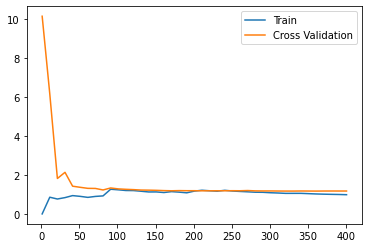

In [21]:
plt.plot(train_sizes_abs, train_scores_mean, label='Train')
plt.plot(train_sizes_abs, cv_scores_mean, label='Cross Validation')

plt.legend()

In [22]:
# Fitting the model
model = lr.fit(x_train, y_train)

In [23]:
# Optimal parameter
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients: ", coefficients)
print("Intercept: ", model.intercept_)

Coefficients:  [-1.67239147e-02 -5.89234209e-02  5.40580240e-02  3.79193156e-02
  4.14525098e-01  2.53991798e+00  2.41725759e+13  2.41725759e+13]
Intercept:  11.90308370044053


## ⛱ Evaluation

In [24]:
y_test_pred = model.predict(x_test)

In [25]:
# To see how our model performs on data that model has NOT seen

rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 1.6011259304787424
R2-score: 0.7846655339881837


**Creating a pipeline**

In [26]:
scaling = ('scale', StandardScaler())
model = ('model', linear_model.LinearRegression())

# Steps in the pipeline
steps = [scaling, model]

pipe = Pipeline(steps=steps)

# Fiitting the model
model = pipe.fit(x_train, y_train)

# Out-Of-Sample Forecast
y_test_pred = model.predict(x_test)

# Evaluation
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 1.6055260361901984
R2-score: 0.7834803725768786


In [27]:
# Saving the model
dump(model, 'model.joblib')

['model.joblib']

`Visualizing` our prediction against actual values.

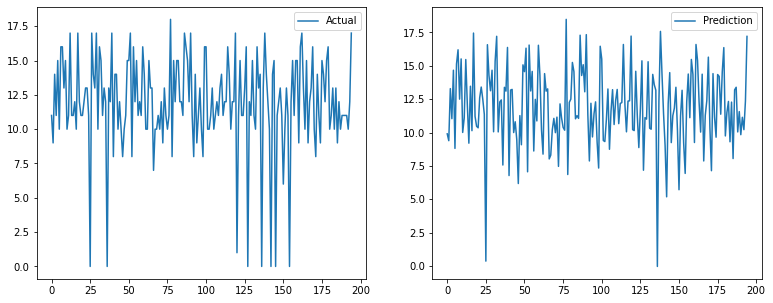

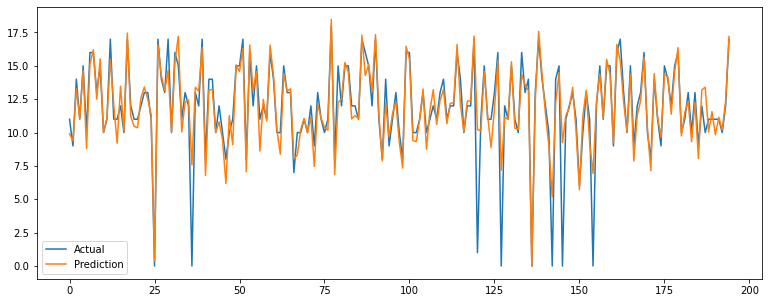

In [28]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax3.legend()

---

I'll wrap things up there. If you want to find some other answers then go ahead `edit` this kernel. If you have any `questions` then do let me know.

If this kernel helped you then don't forget to 🔼 `upvote` and share your 🎙 `feedback` on improvements of the kernel.

![](https://media.giphy.com/media/ny7UCd6JETnmE/giphy.gif)

---